Connecté à Python 3.12.6

In [ ]:
# Importation des librairies 
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns


# Importation de la base de données
data = pd.read_excel(r"d:\Projets\Projet Informatique\Bases de données\secteurs_modified.xlsx")
data = data.select_dtypes(exclude=['object'])
data.columns
data.isna().sum()
data.duplicated().sum()
data= data.drop(columns=['Émissions de CO2 décalées'])
data['Émissions de CO2 décalées'] = data['Log Émissions de CO2']/ data['CO2eq']

# Standardisation des données
scaler = StandardScaler()
datastand = scaler.fit_transform(data)

In [ ]:
# Initialisation du clusters
kmean = KMeans(n_clusters=4)
kmean.fit(datastand)
data['Clusters'] = kmean.labels_
data

,Année,CO2eq,Taxe sur le carbone,PIB provincial,Population,Log Émissions de CO2,Secteur_Agriculture,Secteur_Bâtiments,Secteur_Déchets,Secteur_Industrie lourde,"Secteur_Industrie manufacturière légère, construction et exploitation forestière",Secteur_Production de charbon,Secteur_Pétrole et gaz,Secteur_Transports,Secteur_Électricité,Émissions de CO2 décalées,Clusters
0,1990,65.213096,0,143.635030,5.597152,4.192878,0,0,0,0,0,0,1,0,0,0.064295,2
1,1990,39.759144,0,287.678577,1.071794,3.707680,0,0,0,0,0,0,0,0,1,0.093254,0
2,1990,17.013087,0,232.998485,2.560279,2.891099,0,0,0,0,0,0,0,1,0,0.169934,0
3,1990,12.635739,0,199.664621,6.552241,2.612694,0,0,0,1,0,0,0,0,0,0.206770,1
4,1990,12.029222,0,89.004660,3.947487,2.567195,0,1,0,0,0,0,0,0,0,0.213413,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2764,2019,0.514831,0,83.568713,6.462587,0.415304,0,0,0,0,0,0,0,1,0,0.806680,3
2765,2019,0.026692,0,289.483530,1.725158,0.026342,0,0,0,1,0,0,0,0,0,0.986887,1
2766,2019,0.043481,0,182.414931,1.282348,0.042563,0,1,0,0,0,0,0,0,0,0.978870,3
2767,2019,0.035502,0,110.473324,1.591366,0.034886,0,0,1,0,0,0,0,0,0,0.982658,3


In [ ]:
# Affichage des centroïdes
centroids = kmean.cluster_centers_
print('Centroids des clusters:')
print(centroids)

Centroids des clusters:
[[-1.13166660e-02  5.75657774e-01  4.98205836e-02  1.13126750e-02
   5.38832279e-03  1.02168615e+00  4.01039840e-01  1.32673051e-01
  -3.67833322e-01 -3.67833322e-01 -2.51048502e-01 -2.30764354e-01
  -3.67833322e-01  7.58306017e-01  2.24432553e-01 -1.03448699e+00]
 [ 7.74596975e-03  2.54808374e-02 -1.36341808e-02  7.94235692e-02
   1.55877399e-02  5.25548123e-02 -3.60838027e-01 -3.67833322e-01
  -3.67833322e-01  2.71862265e+00 -3.67833322e-01 -2.30764354e-01
  -3.67833322e-01 -3.67833322e-01 -3.67833322e-01 -3.25294840e-02]
 [ 7.74596975e-03  4.59866464e-01 -1.36341808e-02 -3.80137271e-02
   4.70972030e-02  2.05307475e-01 -3.60838027e-01 -3.67833322e-01
  -3.67833322e-01 -3.67833322e-01 -3.67833322e-01 -2.30764354e-01
   2.71862265e+00 -3.67833322e-01 -3.67833322e-01 -1.38982197e-01]
 [ 2.38275588e-03 -4.28160235e-01 -2.03569558e-02 -1.60968790e-02
  -1.80229292e-02 -6.14420971e-01 -4.28169351e-02  1.05618652e-01
   3.76162638e-01 -3.67833322e-01  3.13035708e-01

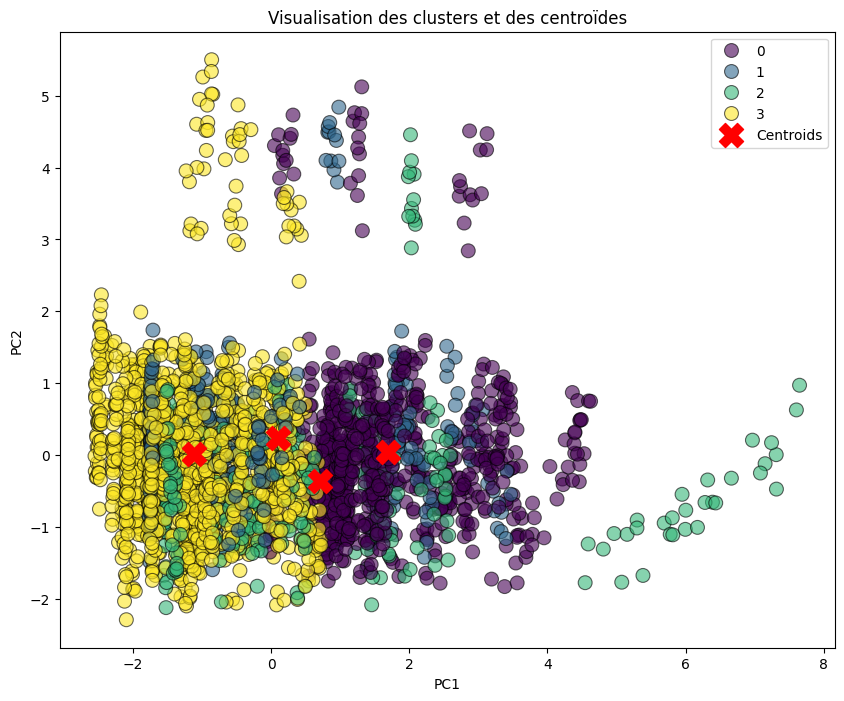

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Réduction de la dimensionnalité à 2D pour la visualisation
pca = PCA(n_components=2)
data_pca = pca.fit_transform(datastand)

# Ajout des clusters au DataFrame PCA
data_pca_df = pd.DataFrame(data=data_pca, columns=["PC1", "PC2"])
data_pca_df['Clusters'] = data['Clusters']

# Visualisation des clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Clusters', data=data_pca_df, palette='viridis', s=100, alpha=0.6, edgecolor='k')
plt.scatter(pca.transform(kmean.cluster_centers_)[:, 0], pca.transform(kmean.cluster_centers_)[:, 1], s=300, c='red', label='Centroids', marker='X')
plt.title('Visualisation des clusters et des centroïdes')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score

score = silhouette_score(datastand, kmean.labels_)
print(f'Score de silhouette: {score:.2f}')


Score de silhouette: 0.17
